# HOUSE PRICE PREDICTION

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [4]:
# Load the dataset (replace 'data.csv' with your dataset)
data = pd.read_csv(r"C:\Users\ayush\Downloads\Housing.csv")

In [5]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
# Explore the dataset
print("Dataset overview:")
print(data.head())
print(data.info())

Dataset overview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data colu

In [12]:
data1 = data.copy()

In [13]:
#Data Preprocessing
#Handle missing values (if any)
data1.dropna(inplace=True)

In [15]:
#converting all yes/no into 1/0
data1.mainroad.replace(("yes","no"),(1,0),inplace = True)
data.guestroom.replace(("yes","no"),(1,0),inplace = True)
data1.basement.replace(("yes","no"),(1,0),inplace = True)
data1.hotwaterheating.replace(("yes","no"),(1,0),inplace = True)
data1.airconditioning.replace(("yes","no"),(1,0),inplace = True)
data1.prefarea.replace(("yes","no"),(1,0),inplace = True)

In [17]:
# creating dummies for object data
data1 = pd.get_dummies(data1)
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,guestroom_no,guestroom_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,1,2,1,1,0,1,0,0
1,12250000,8960,4,4,4,1,0,0,1,3,0,1,0,1,0,0
2,12250000,9960,3,2,2,1,1,0,0,2,1,1,0,0,1,0
3,12215000,7500,4,2,2,1,1,0,1,3,1,1,0,1,0,0
4,11410000,7420,4,1,2,1,1,0,1,2,0,0,1,1,0,0


In [20]:
# Dividing our data into input and output variables 
X = data1.iloc[:,1:]
Y = data1.iloc[:,0]

In [22]:
# Feature selection (optional, can improve model performance)
selector = SelectKBest(score_func=f_regression, k=2)
X = selector.fit_transform(X, Y)

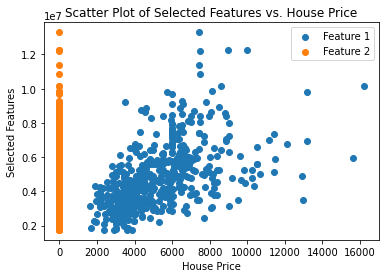

In [27]:
# Visualize the data
plt.scatter(X[:, 0], Y, label='Feature 1')
plt.scatter(X[:, 1], Y, label='Feature 2')
plt.xlabel('House Price')
plt.ylabel('Selected Features')
plt.legend()
plt.title('Scatter Plot of Selected Features vs. House Price')
plt.show()

In [26]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
# Hyperparameter tuning (optional, tune model parameters for better performance)
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_

In [30]:
# Create and train the linear regression model
model = best_model if 'best_model' in locals() else LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [31]:
# Make predictions on the test data
Y_pred = model.predict(X_test)

In [33]:

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Model Evaluation:
Mean Squared Error: 2885313513570.457
R-squared: 0.4291673924903032


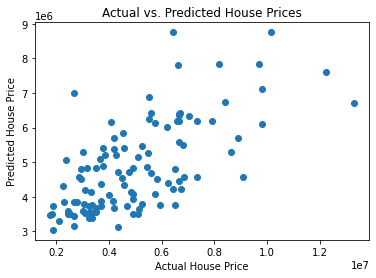

In [36]:
# Visualize the predicted vs. actual values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()